<a href="https://colab.research.google.com/github/hhaeri/Interpreting-Text-Classifiers/blob/main/HaniehH_InterpretingML_Week2_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 - Interpreting Text Classifiers💬 and Benchmarking Explainers🧪

As a data scientist at a movie streaming company, you've been tasked with finding ways to improve the platform's movie recommendation system. One of the biggest challenges is understanding how users feel about the movies they watch. Sure, you can look at the star ratings they give, but those aren't always the most informative. That's why you've decided to dig deeper and use interpretable AI to analyze movie reviews and understand the sentiment behind them. You are given a NLP model that is trained on millions of tweets that are not necessarily movie reviews. The models extract features such as the presence of certain words or phrases that might indicate a positive or negative opinion and gives you a sentiment of a review based on these features.

<center><img src='https://media.tenor.com/VF5vI70hNv0AAAAC/film-izlemek.gif'></center>



This notebook has two parts. In part A, you create exaplanators for the text classifier that classifies movie reviews. In the part B, you benchmark the different explainers by evaluating faithfulness and plausibility.

Side Notes from Kickoff session:
https://ferret.readthedocs.io/en/latest/user_guide/quickstart.html

# Part A : Interpreting a Text Classifier💬



But the model's predictions aren't enough for you. You want to understand why it's making the predictions it is. So you use interpretable AI techniques like LIME and SHAP to get an understanding of the most important factors that drive a positive or negative opinion.

With this information in hand, your aim is to create a visualization that clearly illustrates the key factors that drive positive or negative opinions about a film. This way, you and the team can easily identify which movies are likely to be well-received by users and which ones are likely to be overlooked. By using interpretable AI to understand movie reviews, your goal is to create a powerful tool that will help the company make better movie recommendations and keep users coming back for more awesome content. Good luck on this journey!

## Installation and Imports🛠️
We will use [Ferret](https://ferret.readthedocs.io/en/latest/readme.html) -  A python package for benchmarking interpretability techniques on Transformers.

In [ ]:
!pip install -U ferret-xai sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
## The Usual Suspects
import pandas as pd
import numpy as np
import torch

## Transformer Models
from transformers import AutoModelForSequenceClassification, AutoTokenizer
## Ferret Benchmarker
from ferret import Benchmark

## Sentiment Analysis Model😍😒
For this project, let's use the NLP model developed by hugging face🤗 for sentiment analysis. Specifically, we will use `twitter-XLM-roBERTa-base` pre-trained model which is trained on over 190M tweets and is tuned for sentiment analysis. Let us leverage on hugging face `transformers` library to load the pre-trained models. See the documentation [here](https://huggingface.co/docs/transformers/v4.25.1/en/autoclass_tutorial#autotokenizer)

In [ ]:
## Before we build our transformer, lets make sure to setup the device.
## To run this notbeook via GPU: Edit -> Notebook settings -> Hardware accelerator -> GPU
## If your GPU is working, device is "cuda"
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
##Q: let's say i want to use another model , how should i find the name or the string to the model on huggingface database? A: https://huggingface.co/models
##TODO: Build pre-trained model and tokenizer using  AutoModelForSequenceClassification, AutoTokenizer
## Make sure to load the model onto the device for gpu

model = AutoModelForSequenceClassification.from_pretrained(name).to(device)
tokenizer = AutoTokenizer.from_pretrained(name) #do I need to load the tokenizer to device as well? here we are not dealing with a big task so no need to paralelize , if we have a big task that needs paralel computing we will send to gpu

In [ ]:
sample_text = "The movie had great narration and visuals despite a boring storyline."
len(tokenizer.tokenize(sample_text))

17

In [ ]:
tokenizer.tokenize(sample_text)

['▁The',
 '▁movie',
 '▁had',
 '▁great',
 '▁narra',
 'tion',
 '▁and',
 '▁visual',
 's',
 '▁de',
 'spite',
 '▁a',
 '▁bor',
 'ing',
 '▁story',
 'line',
 '.']

In [ ]:
encoded_input = tokenizer(sample_text)
encoded_input

{'input_ids': [0, 581, 14277, 1902, 6782, 29718, 1363, 136, 21176, 7, 8, 61518, 10, 3017, 214, 13765, 2256, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.decode(encoded_input['input_ids'])

'<s> The movie had great narration and visuals despite a boring storyline.</s>'

Let us explore the configuration of this model. Use `.config` to get the model configuration, which gives you the model architectures, number of hidden layers, activation function, etc. Most importantly, the class labels.

In [ ]:
model.config.label2id.values()

dict_values([0, 1, 2])

In [ ]:
##TODO: Print the model configuration. Determine the classification labels and store it in the `class_labels` variable

print(model.config)

##TODO: Get the mapping of class labels as Dictionary
class_labels = list(model.config.label2id)


XLMRobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-xlm-roberta-base-sentiment",
  "architectures": [
    "XLMRobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative",
    "1": "neutral",
    "2": "positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 0,
    "neutral": 1,
    "positive": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.33.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}



### Build Explainer 🤔
Using [Ferret XAI](https://uplimit.com/course/interpreting-machine-learning-models/v2/enrollment/enrollment_clfu87d0x00rl129mefa50hz9/module/ferret-50e7bf), we will benchmark our pre-trained model from huggingface. See [Benchmark](https://ferret.readthedocs.io/en/latest/readme.html#visualization) documentation

In [ ]:
##TODO: Build explainer using `Benchmark` function
from ferret import Benchmark
explainer = Benchmark(model,tokenizer)


Use `score` method to predict the overall sentiment for a sample text

In [ ]:
sample_text = "The movie had great narration and visuals despite a boring storyline."


##TODO: Use `score` method to obtain the class scores
# explanation = explainer.explain(sample_text,target = 1)
# print(explanation)
# evaluation = explainer.evaluate_explanations(explanation,target = 1)
print(explainer.score(sample_text))

{'negative': 0.09874014556407928, 'neutral': 0.13105592131614685, 'positive': 0.7702038884162903}


In [ ]:
##I wanted to check if the permutation of the words (switcing their places) instead of removing words have an effect in generated explanation so i switched great and boring spot
# in the sentence and I observed the scores fliped as well
sample_text2 = "The movie had boring narration and visuals despite a great storyline."
print(explainer.score(sample_text2))

{'negative': 0.8876940011978149, 'neutral': 0.07846827805042267, 'positive': 0.033837735652923584}


### Generate Explanations using the Explainer🧞
Notice that the sentiment for the `sample_text` is overall positive. We also notice small scores for 'neutral'  and 'negative' classes. Let us use Ferret XAI explainers to understand the predictions of the model. Ferret has various built-in post-hoc explainers which are variants of the ones we studied and used an in [Week 1](https://corise.com/course/interpreting-machine-learning-models/v2/module/interpreting-an-image-classifier) for image classification models. Here, we will use the same sample text for movie review and generate explanations for different sentiment classes (postive, negative and neutral).

#### Generate explanations for positive class.



In [ ]:
## TODO: Generate explanation for postive class (target = 2) and show the explanations in a table
## Hint use `target` attribute to specify the class as integer. Note the three classes in the score above

explain_posclass = explainer.explain(sample_text,target = 2)
explainer.show_table(explain_posclass)


Explainer:   0%|          | 0/6 [00:00<?, ?it/s]

Token,▁The,▁movie,▁had,▁great,▁narra,tion,▁and,▁visual,s,▁de,spite,▁a,▁bor,ing,▁story,line,.
Partition SHAP,0.01,0.07,-0.02,0.29,0.08,0.02,0.05,0.06,0.03,0.04,0.12,0.01,-0.07,-0.08,0.03,0.02,-0.02
LIME,-0.02,0.09,-0.01,0.30,0.02,-0.02,0.05,0.09,0.04,0.08,0.07,0.00,-0.07,-0.03,0.01,0.03,0.05
Gradient,0.03,0.07,0.05,0.07,0.06,0.03,0.03,0.08,0.02,0.03,0.12,0.02,0.13,0.04,0.06,0.05,0.02
Gradient (x Input),-0.06,-0.10,0.00,-0.00,-0.01,-0.03,-0.03,0.07,0.04,0.05,-0.04,0.01,0.19,0.06,-0.03,-0.10,0.03
Integrated Gradient,-0.02,0.02,-0.10,-0.13,-0.08,-0.01,0.01,-0.03,-0.00,-0.04,0.00,-0.04,-0.01,0.00,-0.01,0.02,-0.05
Integrated Gradient (x Input),-0.03,0.08,0.12,0.19,0.06,0.04,0.06,0.05,0.00,-0.00,-0.09,0.05,-0.03,0.01,0.03,0.04,0.12


#### Generate explanations for negative class.

In [ ]:
## TODO: Generate explanation for negative class (target = 0) and show the explanations in a table

explain_negclass = explainer.explain(sample_text,target = 0)
explainer.show_table(explain_negclass)


Explainer:   0%|          | 0/6 [00:00<?, ?it/s]

Token,▁The,▁movie,▁had,▁great,▁narra,tion,▁and,▁visual,s,▁de,spite,▁a,▁bor,ing,▁story,line,.
Partition SHAP,-0.00,-0.04,0.01,-0.19,-0.06,0.00,-0.04,-0.04,-0.00,-0.06,-0.20,-0.01,0.12,0.15,-0.01,0.02,0.03
LIME,-0.01,-0.06,0.02,-0.16,-0.04,0.04,-0.01,-0.11,-0.00,-0.10,-0.07,-0.04,0.14,0.12,-0.02,0.01,-0.05
Gradient,0.03,0.06,0.04,0.06,0.06,0.03,0.03,0.07,0.02,0.03,0.11,0.02,0.16,0.05,0.06,0.05,0.02
Gradient (x Input),0.07,0.07,-0.00,0.06,-0.02,0.02,0.04,-0.06,-0.03,-0.02,0.05,-0.01,-0.15,-0.07,0.03,0.09,-0.02
Integrated Gradient,-0.01,-0.03,-0.01,0.03,0.02,-0.03,-0.01,-0.00,0.05,0.12,0.02,0.09,-0.19,0.03,0.08,-0.02,0.08
Integrated Gradient (x Input),0.06,-0.00,-0.04,-0.13,-0.07,-0.04,-0.08,-0.09,0.04,0.01,0.15,-0.06,0.11,0.01,-0.02,-0.04,-0.05


## Leave-one-out (Erasure) 🔠🔤
Besides different explainers, one of the standard techniques is to use the [Erasure or Leave-one-out method](https://uplimit.com/course/interpreting-machine-learning-models/v2/enrollment/enrollment_clfu87d0x00rl129mefa50hz9/module/leave-one-out-method-wb0hqk) . Here we delete words from the text iteratively and measure change in prediction probabilities. Let us create our own whitespace tokenizer.

In [ ]:
sample_text = "The movie had great narration and visuals despite a boring storyline"

## TODO: Tokenize the text by splitting it into each word. Then generate the sentence by leaving the one word
## Make sure the generated sentence has no additional white spaces

tokenize_text = sample_text.split(" ")

loo_texts = [' '.join(tokenize_text[0:i])+' '+ ' '.join(tokenize_text[i+1:]) for i,word in enumerate(tokenize_text)]
loo_texts


[' movie had great narration and visuals despite a boring storyline',
 'The had great narration and visuals despite a boring storyline',
 'The movie great narration and visuals despite a boring storyline',
 'The movie had narration and visuals despite a boring storyline',
 'The movie had great and visuals despite a boring storyline',
 'The movie had great narration visuals despite a boring storyline',
 'The movie had great narration and despite a boring storyline',
 'The movie had great narration and visuals a boring storyline',
 'The movie had great narration and visuals despite boring storyline',
 'The movie had great narration and visuals despite a storyline',
 'The movie had great narration and visuals despite a boring ']

In [ ]:
## TODO: Generate scores for each of the leave one out sentences and tabulate the scores in a Dataframe corresponding to the word omitted

scores = [explainer.score(text) for text in loo_texts]
pd.DataFrame(scores, index=sample_text.split(" "))


,negative,neutral,positive
The,0.223850,0.206326,0.569824
movie,0.263907,0.219848,0.516245
had,0.120151,0.142724,0.737124
great,0.287786,0.299730,0.412484
narration,0.267983,0.214153,0.517864
and,0.188767,0.190426,0.620807
visuals,0.184359,0.182071,0.633569
despite,0.859677,0.100246,0.040077
a,0.112969,0.161386,0.725645
boring,0.355356,0.232932,0.411712


## Open ended explanations using Language Models(LM)👐

Besides the conventional methods of analyzing the given prompt, we will try open ended language models to analyze why the reviews have particular sentiment. Let us try previous `sample_text` we used and modify it slightly to make it incomplete. Then, we will use BLOOM to fill out the incomplete sentence.The architecture of BLOOM is essentially similar to GPT3 with over 176B parameters. However, we will use a variant of BLOOM with 560M parameters, which will generate text faster. For documentation of generator, refer [here](https://huggingface.co/docs/transformers/main_classes/text_generation)

In [ ]:
# Import BLOOM tokenizer and generator from transformers
from transformers import BloomTokenizerFast, BloomForCausalLM
tokenizer = BloomTokenizerFast.from_pretrained("bigscience/bloom-560m")
model = BloomForCausalLM.from_pretrained("bigscience/bloom-560m")

# Let's add text at the end of sample text to see why the sentence has positive sentiment. Also define a output length
prompt_text = sample_text + " has a positive sentiment. This is because"
print(prompt_text)
output_length = 100 # Feel free to change this

The movie had great narration and visuals despite a boring storyline has a positive sentiment. This is because


In [ ]:
tokenizer(prompt_text, return_tensors="pt")

{'input_ids': tensor([[  2175,  51651,   3866,  10087,  29880,    529,    530, 243253,  45747,
            267, 197021,  26143,   4576,   1809,    267,  18121,  35591,     17,
           3904,    632,   5908]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
## TODO: Tokenize the sentence as tensors and then use the model to generate a complete sentence with a max length
inputs = tokenizer(prompt_text, return_tensors="pt")
gen1 =model.generate(**inputs, max_length=output_length)[0]
print(tokenizer.decode(gen1))

The movie had great narration and visuals despite a boring storyline has a positive sentiment. This is because the movie is a comedy and the characters are not bad. The movie is a good movie for the youngsters. The movie is a good movie for the adults. The movie is a good movie for the seniors. The movie is a good movie for the parents. The movie is a good movie for the teachers. The movie is a good movie for the students. The movie is a good movie


Notice that the sentences are somewhat repetitive. Let us avoid this by adding a penalty for repetition. To understand repetition penalty (penalized sampling), refer to section 4 in this [paper](https://arxiv.org/pdf/1909.05858.pdf)

In [ ]:
# TODO: Add a penalty for repetition
gen2 =model.generate(**inputs, max_length=output_length, repetition_penalty = 5.)[0]
print(tokenizer.decode(gen2))

The movie had great narration and visuals despite a boring storyline has a positive sentiment. This is because the film was written by an actor who plays himself in his own life, which makes it more realistic.
In this case we have to say that there are some scenes where you can see how he feels about being alone with her (and not having any other girl). He also talks openly on what happened during their relationship but does so without making him feel guilty or ashamed of anything else as well. (


In [ ]:
# TODO: Add a penalty for repetition
gen2 =model.generate(**inputs, max_length=output_length, repetition_penalty = 1.2)[0] #the paper states that the p=1.2 yields a good balance between truthful generation and lack of repetition.
#in my case 1.1 and and higher generate the same text
print(tokenizer.decode(gen2))

The movie had great narration and visuals despite a boring storyline has a positive sentiment. This is because the film was written by an actor who plays himself in his own life, which makes it more realistic.
In this case we have to say that there are some scenes where you can see how he feels about being alone with her (and not having any other girl). He also talks openly on what happened during their relationship but does so without making him feel guilty or ashamed of anything else as well. (


In [ ]:
# TODO: Add a penalty for repetition
gen2 =model.generate(**inputs, max_length=output_length, repetition_penalty = 1.01)[0] #the paper states that the p=1.2 yields a good balance between truthful generation and lack of repetition.
#in my case 1.1 and and higher generate the same text
print(tokenizer.decode(gen2))

The movie had great narration and visuals despite a boring storyline has a positive sentiment. This is because the film was written by an actor who plays himself in his own life, which makes it more realistic.
In this case we have to say that there are some scenes where you can see how he feels about being alone with her (and not having any other girl). He also talks openly about what happened between him and Karan Johar during their relationship but I think it’s just too much for me


In [ ]:
## TODO: We will also use sampling to predict the next word in the sequence to make the sentence more common
gen3 =model.generate(**inputs, max_length=output_length, repetition_penalty = 1.01,do_sample=True)[0]
print(tokenizer.decode(gen3))

The movie had great narration and visuals despite a boring storyline has a positive sentiment. This is because this film was not something people really would want to watch.
Tomb Raider: The Complete Movie Online Full Screen 2020 English Audio HD Download – A TON OF FUN WITH LIFE IT MAKES HARD TO EVER STAY UNDER THE BURSTS
Avoid all the dangers, while you fight for your country in World War II - Live Likegetty Images


In text-generation, a good model tries to sample from a huge pool of words. While always selecting the word with highest likelihood will result in repetitions, selecting at random may lead to vague or uncommon sentences. A common practice is to use top-k or top-p approaches (see [article]([here](https://docs.cohere.ai/docs/controlling-generation-with-top-k-top-p))) to limit the sample of words and eliminate long tails. Now, explore the model generator by tuning the hyper-parameters. Refer the [blog post](https://huggingface.co/blog/how-to-generate) on 'how to generate'

In [ ]:
## TODO: Tweak the hyper parameters for our use case.
## Use top_p and top_k to have better sampling of words
gen4 =model.generate(**inputs, max_length=output_length, repetition_penalty = 1.01,do_sample=True,top_k = 50, top_p = 0.95)[0]
print(tokenizer.decode(gen4))

The movie had great narration and visuals despite a boring storyline has a positive sentiment. This is because it plays on the idea of love as well as hate but with good characters, acting by turns very funny or just some nice scenes in the middle which leads to a more enjoyable experience for us.
My personal opinion about this film was that there’s not much else besides the clichés you see every day when we read movies such as “Man On The Go” without feeling too guilty
“The


## Outro 💭💭💭

Well done Data Scientist! Now that we've seen different methods for analzying  the sentiment predicts, its tiem to answer some questions!

1. What are your thoughts on Interpretable AI for Text Classification?
2. Compare the various explanations. Which method do you agree with most, why?
3. Do you think the Language Models(Open Ended explanations) capture the sentiment well and explain them? Did fine tuning the parameters help and what worked the best for you?

ANSWERS:
1.   Interpretable AI for text classification is pivotal for establishing transparency and trust in AI systems, especially in fields like healthcare and law where accurate, accountable decisions are critical. Challenges arise due to the complexity of text data and the black-box nature of deep learning models. Techniques such as LIME, SHAP, attention mechanisms, and rule-based models aim to provide explanations for model predictions
2.   In my opinion none of the explainers we tested here could provide a holistic explanation of model's prediction although each of them could be aided to explain the behavior of the model. Leave-one-out explainers may oversimplify the complexity of interactions between features. They focus on the impact of individual elements and may not capture emergent behavior resulting from feature interactions.Open-ended explainers prioritize providing a holistic, flexible, and potentially qualitative understanding of the model, whereas leave-one-out explainers aim to quantify the importance of individual features systematically. Open-ended explainers are useful when you want to explore and gain insights into a model's behavior without specific constraints. Leave-one-out explainers are valuable when you need to measure and rank the importance of individual features or components.  
3.   I dont think the open ended explanations created by Bloom LM were able to provide plausible explanation although they tried their best to stay possitive as ordered by the prompt. Bloom doesnt have any access to the actual model and just make the open ended explanations based on the prompt given, so it put its effort to create a plausible answer based on the given promt which is supposed to be possitive but boring, hence the gibberish stories it spits out (LOL). Also it is important to note that the BLOOM model we are usinbg here is pre trained  with only 560m parameters. Perhaps the BLOOM model that is trained with 176B parameters can provide more plausible answers.
One more thing that comes to my mind is that we are prompting the LM with a very vauge prompt (the .. is great, despit boring ...) this prompt even doesnt make sense to us as humans and doesnt provide much of information to the LM to produce plausible open ended explainations.  




# Part  B: Benchmarking explanation methods🧪

As you begin to check the movie reviews, you notice that the model is able to correctly classify most of reviews, but as you dig deeper you realize that some of the posts that the model classifies as postive, contain subtle hints that the movie goers were not satisfied. You try out different explnations but each of them give you different results. You are unsure if you can trust some or any of these explanations.

In this scenario, the importance of faithfulness and plausibility in an explainer model becomes paramount. The faithfulness of the model's explanation ensures that the review's classification is based on accurate and consistent reasoning and able to capture the real intent behind the user's review, while plausibility ensures that the explanation aligns with the platform's policies and is understandable to the social media manager.

Your task is to use the XAI principles and understand the faithfulness and plausibility of this sentiment model. Let's get started!

## Evaluating Faithfulness⛑️

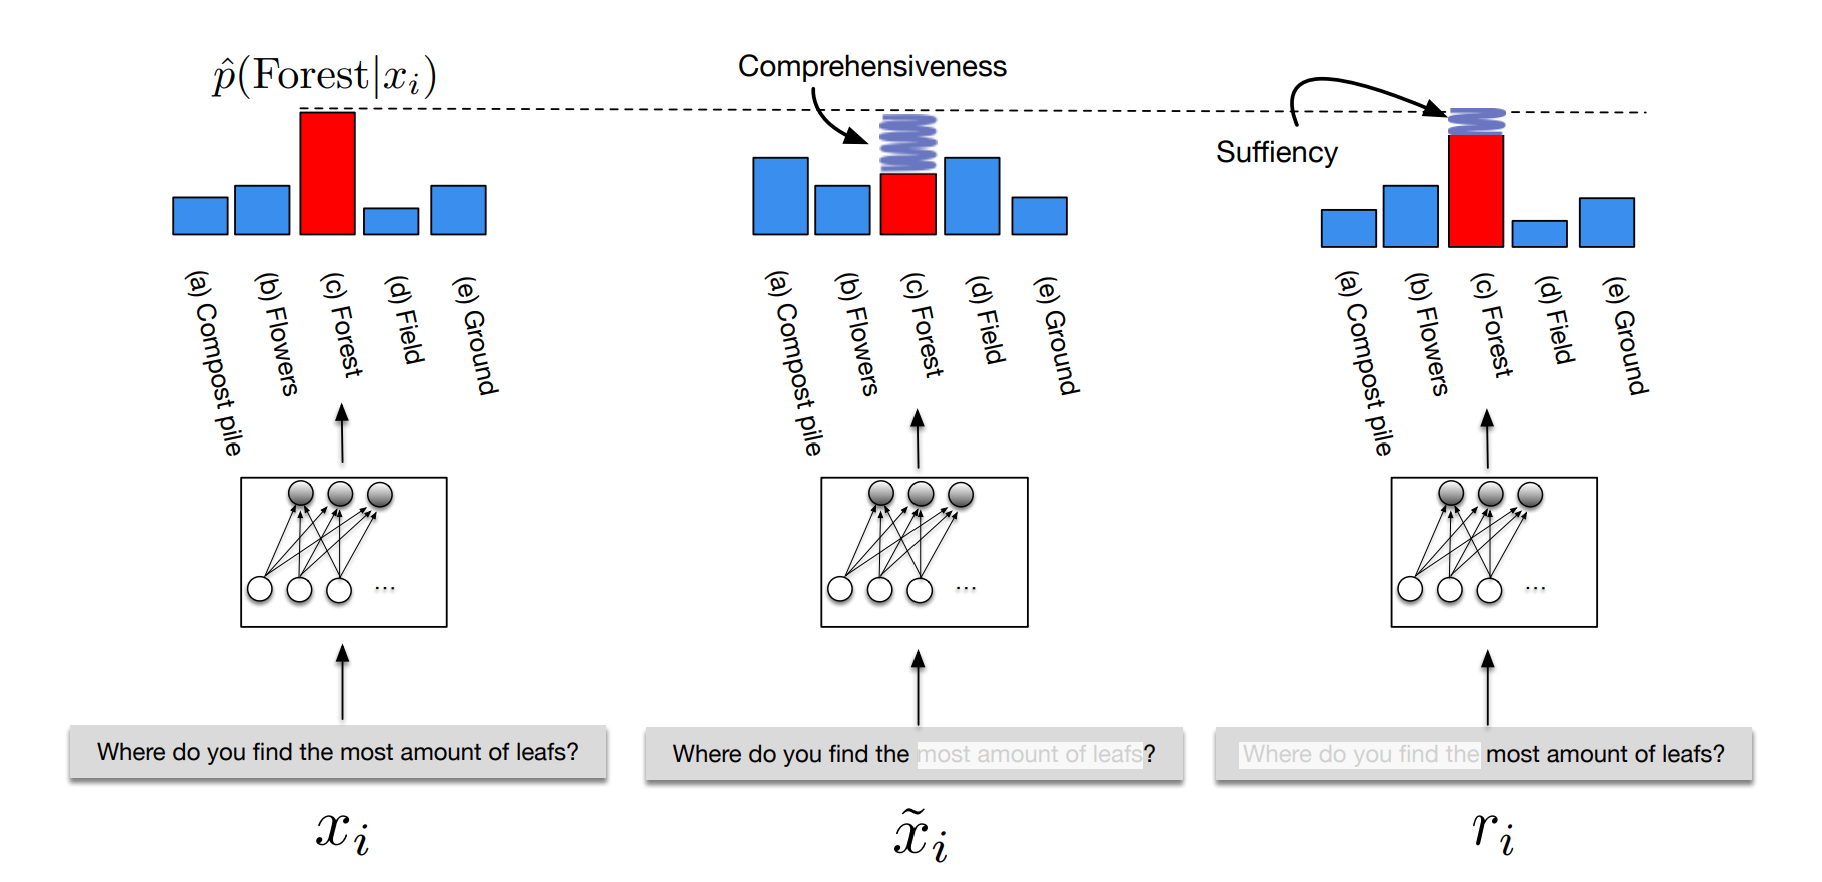
**AOPC Comprehensiveness.** Comprehensiveness measures the drop in the model probability if the relevant tokens of the explanations are removed. We measure comprehensiveness via the Area Over the Perturbation Curve by progressively considering the most important tokens, from 1 to #tokens and then averaging the result. The higher the value, the more the explainer is able to select the relevant tokens for the prediction.

**AOPC Sufficiency.** Sufficiency captures if the tokens in the explanation are sufficient for the model to make the prediction.

**Correlation with Leave-One-Out scores.** We first compute the leave-one-out scores by computing the prediction difference when one feature at the time is omitted. We then measure the Spearman correlation with the explanations.

In [ ]:
## TODO: Evaluate the explantions using the `evaluate_explanations` method
# Use the positive class explainer we built earlier and Specify the target class with `target`

evaluate_positive_explanations = explainer.evaluate_explanations(explain_posclass, target=2)

## TODO: Use `show_evaluation_table` to show the evaluated explanations

explainer.show_evaluation_table(evaluate_positive_explanations)

Explanation eval:   0%|          | 0/6 [00:00<?, ?it/s]

,aopc_compr,aopc_suff,taucorr_loo
Partition SHAP,0.65,0.10,0.24
LIME,0.64,0.12,0.18
Gradient,0.45,0.24,0.35
Gradient (x Input),0.08,0.67,0.15
Integrated Gradient,0.03,0.51,0.01
Integrated Gradient (x Input),0.43,0.04,-0.31


## Evaluating Plausibility👌

Plausibility evaluates how well the explanation agrees with human rationale. We use Area Under the Precision Recall curve (AUPRC) (auprc_plau), token-level f1-score (token_f1_plau) and average Intersection-Over-Union (IOU)(token_iou_plau) for evaluating plausibility.

* **Area Under the Precision Recall curve (AUPRC)** is computed by sweeping a threshold over token scores.

* **Token-level f1-score** is the token-level F1 scores derived from the token-level precision and recall.

* **Intersection-Over-Union (IOU)** measures overlap of the tokens they cover divided by the size of their union.



In [ ]:
## Let us use the same sample review as in Part A
sample_text = "The movie had great narration and visuals despite a boring storyline."

In [ ]:
## Before we proceed further, let us revert to the tokenizer we used for movie reviews
name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(name)

In [ ]:
## TODO: Create tokens for the example_text2 using `tokenizer`

tokens = tokenizer.tokenize(sample_text)
print(tokens)


['▁The', '▁movie', '▁had', '▁great', '▁narra', 'tion', '▁and', '▁visual', 's', '▁de', 'spite', '▁a', '▁bor', 'ing', '▁story', 'line', '.']


Let us evaluate if the explanations are plausible🤨. To do this, we will annotate the tokens manually and create a human rationale🧔‍♂️. These rationales should contain the words or phrases that most influenced the annotator's label choice. In this context, if you think the particular token represents `positive`💪, mark it with 1️⃣ else with 0️⃣. Make sure to annotate all the tokens in the same order.

In [ ]:
## TODO: Create a list of 0s and 1s to indicate if the token was useful for making the prediction
## Make sure the list is of same length as that of teokenized sentence

human_rationale = [0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0]
len(human_rationale)==len(tokens)

True

In [ ]:
## TODO: Evaluate the explantions using the `evaluate_explanations` method
# Specify the target class and human rationale

expl_eval_plausibility = explainer.evaluate_explanations(
    explain_posclass,
    target=2,
    human_rationale = human_rationale
)

explainer.show_evaluation_table(expl_eval_plausibility)

Explanation eval:   0%|          | 0/6 [00:00<?, ?it/s]

,aopc_compr,aopc_suff,taucorr_loo,auprc_plau,token_f1_plau,token_iou_plau
Partition SHAP,0.65,0.10,0.24,0.62,0.50,0.33
LIME,0.64,0.12,0.18,0.60,0.33,0.20
Gradient,0.45,0.24,0.35,0.43,0.33,0.20
Gradient (x Input),0.08,0.67,0.15,0.32,0.33,0.20
Integrated Gradient,0.03,0.51,0.01,0.41,0.17,0.09
Integrated Gradient (x Input),0.43,0.04,-0.31,0.50,0.17,0.09


## Outro💭💭💭
Yay you made it 👏👏
<center><img src= "https://media.giphy.com/media/12d19apJyRsmA/giphy.gif"/></center>


---
Answer these following questions


1. Which is most faithful explainer? Give reasoning
2. Which is most plausible explainer? Explain why
3. Do you think you can rely on this emotion classification model based on faithfulness and plausibility of the best explainers?






**ANSWERS**
1.   Bases on the taucor values Gradient Method is the most faithful method of all because it has the highest value of 0.35
2.   Bases on f1 score and IOU values SHAP Method is the most plausible method of all because it has the highest value of 0.5 and 0.55
3.    



# Bonus💰💰
Kudos👏! It is amazing you made it here. In the bonus section, let us apply our model to some real world data.



*   You can use either use hugging face `imdb` dataset or a review from anywhere for any movie. Get the sentiment for the review and see which words are most important for the sentiment by the methods we used earlier
*   The `cardiffnlp/twitter-xlm-roberta-base-sentiment` is not trained on imdb dataset. Lets us see if using a model trained on imdb dataset can give us better results. You can try `distilbert-imdb` from [here](https://huggingface.co/lvwerra/distilbert-imdb) or other models trained/fined-tuned on imdb from [here](https://huggingface.co/datasets/imdb)



---


Answer the following questions once you complete the analysis:

1. Do you think XAI is useful to understand the sentiment behind real-world movie reviews?
2. Based on your observations, would your recommendation change from what it was previously?
3. Does training/fine-tuning help a model to understand and interpret sentiment better?
4. Evaluate the faithfulness of explainers using all classes. Is your most faithful explainer different from what it was previously? Explain your reasoning.
5. Evaluate the plausibility of explainer using the a `sample_text` of your own choice but for all classes considering one target at a time. Do you notice any difference in the plausibilities for different emotions for the same explainer? If yes, why do you think so.

In [ ]:
import datasets
from datasets import load_dataset

In [ ]:
## Here is starter code to download the imdb dataset. You could also try any review for any movie.
# from datasets import load_dataset
dataset = load_dataset("imdb")


In [ ]:
sample_review = dataset['test'][10]
sample_review

{'text': 'This flick is a waste of time.I expect from an action movie to have more than 2 explosions and some shooting.Van Damme\'s acting is awful. He never was much of an actor, but here it is worse.He was definitely better in his earlier movies. His screenplay part for the whole movie was probably not more than one page of stupid nonsense one liners.The whole dialog in the film is a disaster, same as the plot.The title "The Shepherd" makes no sense. Why didn\'t they just call it "Border patrol"? The fighting scenes could have been better, but either they weren\'t able to afford it, or the fighting choreographer was suffering from lack of ideas.This is a cheap low type of action cinema.',
 'label': 0}

In [ ]:
#encoded_input = tokenizer(sample_review)
print(explainer.score(sample_review['text']))

{'negative': 0.9212380051612854, 'neutral': 0.0584341436624527, 'positive': 0.020327821373939514}


In [ ]:
explain_negclass_rev = explainer.explain(sample_review['text'],target = 0)
explainer.show_table(explain_negclass_rev)


Explainer:   0%|          | 0/6 [00:00<?, ?it/s]

,▁This,▁f,lick,▁is,▁a,▁was,te,▁of,▁time,.,I,▁expect,▁from,▁an,▁action,▁movie,▁to,▁have,▁more,▁than,▁2,▁explo,sions,▁and,▁some,▁shooting,..1,Van,▁Da,mme,',s,▁ac,ting,▁is.1,▁a.1,w,ful,..2,▁He,▁never,▁was.1,▁much,▁of.1,▁an.1,▁actor,",",▁but,▁here,▁it,▁is.2,▁worse,..3,He,▁was.2,▁definitely,▁better,▁in,▁his,▁earlier,▁movies,..4,▁His,▁screen,play,▁part,▁for,▁the,▁whole,▁movie.1,▁was.3,▁probably,▁not,▁more.1,▁than.1,▁one,▁page,▁of.2,▁stupid,▁non,sense,▁one.1,▁li,ners,..5,The,▁whole.1,▁dialog,▁in.1,▁the.1,▁film,▁is.3,▁a.2,▁disa,ster,",.1",▁same,▁as,▁the.2,▁plot,..6,The.1,▁title,"▁""",The.2,▁She,pher,d,"""",▁makes,▁no,▁sense,..7,▁Why,▁didn,'.1,t,▁they,▁just,▁call,▁it.1,"▁"".1",B,order,▁patrol,"""?",▁The,▁fighting,▁scene,s.1,▁could,▁have.1,▁been,▁better.1,",.2",▁but.1,▁either,▁they.1,▁were,n,'.2,t.1,▁able,▁to.1,▁afford,▁it.2,",.3",▁or,▁the.3,▁fighting.1,▁cho,reo,graph,er,▁was.4,▁suffering,▁from.1,▁lack,▁of.3,▁ideas,..8,This,▁is.4,▁a.3,▁cheap,▁low,▁type,▁of.4,▁action.1,▁cinema,..9
Partition SHAP,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.01,0.01,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.03,0.03,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
LIME,0.01,0.01,0.00,0.01,0.00,0.03,0.02,-0.00,0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.01,0.01,0.00,-0.00,0.00,-0.01,-0.00,0.00,0.01,-0.00,0.01,0.03,0.03,0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.01,-0.01,-0.00,-0.00,0.01,0.03,0.00,-0.00,0.00,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,0.01,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,-0.01,-0.00,0.05,0.03,0.03,-0.00,0.02,-0.00,0.00,0.01,0.00,-0.00,0.00,-0.00,-0.00,0.01,0.00,0.05,0.02,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.01,-0.01,0.00,0.00,-0.00,0.00,-0.01,0.01,0.01,0.01,0.01,0.02,-0.00,0.01,-0.00,0.01,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,-0.01,-0.00,-0.01,-0.00,0.00,0.01,0.01,0.00,-0.00,-0.00,0.00,0.01,0.00,-0.00,0.00,-0.00,0.01,-0.00,0.00,0.00,-0.01,-0.00,0.03,0.00,0.01,0.01,0.00,0.00,0.02,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.00,-0.00
Gradient,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.03,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.02,0.01,0.01,0.00,0.01,0.01,0.01
Gradient (x Input),-0.00,-0.00,0.01,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.01,-0.00,-0.01,0.00,-0.00,0.01,0.02,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,-0.01,0.02,-0.01,-0.01,0.00,-0.01,-0.02,0.01,-0.01,-0.01,0.01,0.00,0.01,-0.00,

In [ ]:
name = 'lvwerra/distilbert-imdb'
model2 = AutoModelForSequenceClassification.from_pretrained(name).to(device)
tokenizer2 = AutoTokenizer.from_pretrained(name)

In [ ]:
explainer2 = Benchmark(model2,tokenizer2)
print(explainer2.score(sample_review['text']))

{'NEGATIVE': 0.9958101511001587, 'POSITIVE': 0.004189860541373491}


In [ ]:
explain_negclass_rev = explainer2.explain(sample_review['text'],target = 0)
explainer2.show_table(explain_negclass_rev)

Explainer:   0%|          | 0/6 [00:00<?, ?it/s]

,this,flick,is,a,waste,of,time,.,i,expect,from,an,action,movie,to,have,more,than,2,explosions,and,some,shooting,..1,van,dam,##me,',s,acting,is.1,awful,..2,he,never,was,much,of.1,an.1,actor,",",but,here,it,is.2,worse,..3,he.1,was.1,definitely,better,in,his,earlier,movies,..4,his.1,screenplay,part,for,the,whole,movie.1,was.2,probably,not,more.1,than.1,one,page,of.2,stupid,nonsense,one.1,liner,##s,..5,the.1,whole.1,dial,##og,in.1,the.2,film,is.3,a.1,disaster,",.1",same,as,the.3,plot,..6,the.4,title,"""",the.5,shepherd,""".1",makes,no,sense,..7,why,didn,'.1,t,they,just,call,it.1,""".2",border,patrol,""".3",?,the.6,fighting,scenes,could,have.1,been,better.1,",.2",but.1,either,they.1,weren,'.2,t.1,able,to.1,afford,it.2,",.3",or,the.7,fighting.1,choreographer,was.3,suffering,from.1,lack,of.3,ideas,..8,this.1,is.4,a.2,cheap,low,type,of.4,action.1,cinema,..9
Partition SHAP,0.02,0.01,0.01,0.01,0.11,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.03,0.06,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01
LIME,0.01,0.00,0.00,-0.00,0.06,0.01,0.00,0.00,0.00,0.00,0.01,-0.00,-0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.02,-0.00,-0.01,0.00,0.00,0.05,0.00,-0.01,-0.00,0.01,0.00,-0.00,-0.00,0.01,0.00,-0.00,0.01,-0.00,0.02,0.05,-0.01,-0.00,0.00,-0.04,-0.02,-0.01,-0.00,0.00,-0.01,-0.01,-0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.01,-0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.01,-0.00,-0.01,0.00,0.01,0.00,0.02,0.00,-0.00,-0.00,-0.00,0.02,0.00,0.00,-0.00,-0.01,0.00,-0.00,-0.00,-0.01,0.02,0.01,-0.00,0.00,0.00,-0.01,0.00,0.01,0.00,-0.01,0.00,-0.00,0.00,0.01,0.00,0.01,0.00,0.01,-0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,-0.00,0.01,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.01,0.01,0.01,0.00,-0.00,0.00,-0.00,-0.01,0.02,0.01,0.01,0.01,-0.00,-0.01,0.00
Gradient,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.02,0.06,0.04,0.02,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.00
Gradient (x Input),0.01,-0.01,0.01,0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.01,-0.00,0.00,0.01,-0.00,0.00,0.02,-0.02,0.05,0.01,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.01,0.00,0.01,-0.01,-0.01,-0.02,-0.02,-0.01,0.09,0.04,0.02,-0.02,0.03,-0.01,-0.00,-0.01,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00,-0.00,-0.01,0.00,0.01,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.02,0.05,0.02,-0.01,0.01,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.01,0.00,

In [ ]:
sample_review= sample_review['text']
tokenize_text = sample_review.split(" ")

loo_texts_ = [' '.join(tokenize_text[0:i])+' '+ ' '.join(tokenize_text[i+1:]) for i,word in enumerate(tokenize_text)]

scores_ = [explainer2.score(text) for text in loo_texts_]
pd.DataFrame(scores_, index=sample_review.split(" "))

,NEGATIVE,POSITIVE
This,0.995536,0.004464
flick,0.995772,0.004228
is,0.995913,0.004087
a,0.995658,0.004343
waste,0.993747,0.006253
...,...,...
low,0.995893,0.004107
type,0.995853,0.004147
of,0.995895,0.004105
action,0.995961,0.004039


In [ ]:
tokenizer = BloomTokenizerFast.from_pretrained("bigscience/bloom-560m")
model = BloomForCausalLM.from_pretrained("bigscience/bloom-560m")

# Let's add text at the end of sample text to see why the sentence has positive sentiment. Also define a output length
prompt_text_ = sample_review['text'] + " has a negative sentiment. This is because"
print(prompt_text_)
output_length = 300 # Feel free to change this

This flick is a waste of time.I expect from an action movie to have more than 2 explosions and some shooting.Van Damme's acting is awful. He never was much of an actor, but here it is worse.He was definitely better in his earlier movies. His screenplay part for the whole movie was probably not more than one page of stupid nonsense one liners.The whole dialog in the film is a disaster, same as the plot.The title "The Shepherd" makes no sense. Why didn't they just call it "Border patrol"? The fighting scenes could have been better, but either they weren't able to afford it, or the fighting choreographer was suffering from lack of ideas.This is a cheap low type of action cinema. has a negative sentiment. This is because


In [ ]:
inputs = tokenizer(prompt_text_, return_tensors="pt")
gen3_ =model.generate(**inputs, max_length=output_length, repetition_penalty = 1.2,do_sample=True,top_k=50, top_p=0.95)[0]
print(tokenizer.decode(gen3_))

This flick is a waste of time.I expect from an action movie to have more than 2 explosions and some shooting.Van Damme's acting is awful. He never was much of an actor, but here it is worse.He was definitely better in his earlier movies. His screenplay part for the whole movie was probably not more than one page of stupid nonsense one liners.The whole dialog in the film is a disaster, same as the plot.The title "The Shepherd" makes no sense. Why didn't they just call it "Border patrol"? The fighting scenes could have been better, but either they weren't able to afford it, or the fighting choreographer was suffering from lack of ideas.This is a cheap low type of action cinema. has a negative sentiment. This is because when we view "action crime fiction films ,there are always two stories that I can relate about! And it's obvious why so many people will hate this kind... [read full story]
With millions online trading now available anytime you want access all prices on cryptocurrencies us